In [2]:
import nltk
import string

# Question 01

In [9]:
# (1): list.sort()
words = [
    "mango", "apple", "banana", "cherry", "orange", 
    "pineapple", "pear", "strawberry", "blueberry", "raspberry"
]
print("Return: ", words.sort())
print("Original: ", words)

print("""
- list.sort() returns None.
- The orignial list was sorted alphabetically after running the code.
""")

Return:  None
Original:  ['apple', 'banana', 'blueberry', 'cherry', 'mango', 'orange', 'pear', 'pineapple', 'raspberry', 'strawberry']

- list.sort() returns None.
- The orignial list was sorted alphabetically after running the code.



In [8]:
# (2): sorted(list)
words = [
    "mango", "apple", "banana", "cherry", "orange", 
    "pineapple", "pear", "strawberry", "blueberry", "raspberry"
]
print("Return: ", sorted(words))
print("Original: ", words)

print("""
- The sorted(list) returns the sorted list based on alphabetical order.
- However, the original list would not be affected by sorted() method.
""")

Return:  ['apple', 'banana', 'blueberry', 'cherry', 'mango', 'orange', 'pear', 'pineapple', 'raspberry', 'strawberry']
Original:  ['mango', 'apple', 'banana', 'cherry', 'orange', 'pineapple', 'pear', 'strawberry', 'blueberry', 'raspberry']

- The sorted(list) returns the sorted list based on alphabetical order.
- However, the original list would not be affected by sorted() method.



# Question 02

In [53]:
# writing some text into a file 'corpus.txt'
with open('corpus.txt', 'w') as f:
    f.write('John Doe, the CEO of Acme Corporation, announced on January 1, 2023, that the company had a record-breaking year with profits exceeding $1 million! He said, ‘We’re thrilled with our performance and can’t wait to see what 2023 brings.’ Meanwhile, Jane Smith, the CFO, cautioned, ‘While we’re proud of our results, we must continue to invest wisely for our future.')

In [61]:
# define function load(f)
def load(f: str):
    """
    Read the file and return a string containing the text of the file.

    Prameter:
    - 'f': the name of the file
    """
    # read the file
    with open(f) as f_read:
        text = f_read.read()

    return text

text = load('corpus.txt')
text

'John Doe, the CEO of Acme Corporation, announced on January 1, 2023, that the company had a record-breaking year with profits exceeding $1 million! He said, ‘We’re thrilled with our performance and can’t wait to see what 2023 brings.’ Meanwhile, Jane Smith, the CFO, cautioned, ‘While we’re proud of our results, we must continue to invest wisely for our future.'

In [60]:
# define each tokenization
puncs = r"[\!\"\#\$\%\&\\\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\\]\^\_\`\{\|\}\~\]"  # from string
accounts = r"\$?[0-9]+(?:\,[0-9]{3})*(?:\.[0-9]+)?" # monetary accounts
date1 = r"\d{1,2}[-\/]\d{1,2}[-\/]\d{4}"  # dd-mm-yyyy, dd/mm/yyyy, mm-dd-yyyy, and mm/dd/yyyy
date2 = r"\d{4}[-\/]\d{1,2}[-\/]\d{1,2}" # yyyy-mm-dd or yyyy/mm/dd
date3 = r"(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2}(?:st|nd|rd|th)?,\s\d{4}"
date4 = r"(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2}(?:st|nd|rd|th)?,\s\d{4}"
names = r"[A-Z][a-z]*\s(?:[A-Z]?\.?\s)?[A-Z][a-z]*"  # name or organiation (both start with a capital letter)
words = r"[a-zA-Z]+"  # one or more characters

# combine all expressions 
pattern = f"{puncs}|{accounts}|{date1}|{date2}|{date3}|{date4}|{names}|{words}"

# tokenizes various kinds of punctuation in the text 
token = nltk.regexp_tokenize(text, pattern)
token

['John Doe',
 'the',
 'CEO',
 'of',
 'Acme Corporation',
 'announced',
 'on',
 'January 1, 2023',
 'that',
 'the',
 'company',
 'had',
 'a',
 'record',
 'breaking',
 'year',
 'with',
 'profits',
 'exceeding',
 '$1',
 'million',
 'He',
 'said',
 'We',
 're',
 'thrilled',
 'with',
 'our',
 'performance',
 'and',
 'can',
 't',
 'wait',
 'to',
 'see',
 'what',
 '2023',
 'brings',
 'Meanwhile',
 'Jane Smith',
 'the',
 'CFO',
 'cautioned',
 'While',
 'we',
 're',
 'proud',
 'of',
 'our',
 'results',
 'we',
 'must',
 'continue',
 'to',
 'invest',
 'wisely',
 'for',
 'our',
 'future']

# Question 03


In [89]:
# get some text from brown
brown = nltk.corpus.brown
text_dict = {}
for cat in brown.categories():
    text_dict[cat] = brown.raw(categories=cat)

# tokenize each text
token_dict = {}
for key in text_dict.keys():
    token_dict[key] = nltk.regexp_tokenize(text_dict[key], pattern)


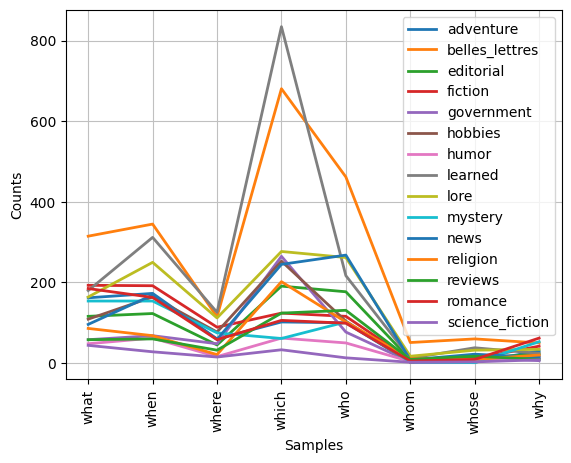

<Axes: xlabel='Samples', ylabel='Counts'>

In [121]:
# define a list of wh-words
wh_words_list = ['when', 'what', 'which', 'who', 'where', 'why', 'whom', 'whose']

# create the conditional frequency distribution
cfd = nltk.ConditionalFreqDist(
    (cat, word.lower())
    for cat, text in token_dict.items()
    for word in text if word.lower() in wh_words_list
)

# showing freq dist of wh-words based on each text (genru)
#for cat in cfd.conditions():
#    print(cat, ": ", cfd[cat].__repr__())

# visualize the number of wh-words in each genre
cfd.plot()

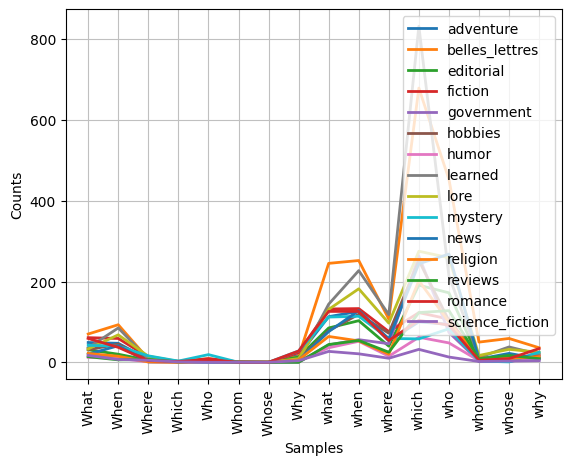

<Axes: xlabel='Samples', ylabel='Counts'>

In [125]:
# Observition 01:  the word duplication due to case distinction

cfd = nltk.ConditionalFreqDist(
    (cat, word)
    for cat, text in token_dict.items()
    for word in text if word.lower() in wh_words_list
)

# visualize the number of wh-words in each genre
cfd.plot()

# Comments:
print("""
- There were duplicated words due to the case distinctions only when I wrote (cat, word) instead of (cat, word.lower());
   note that the second .lower() method is maintained as it is.
- However, since I added lower method for both positions, the computer can address duplicated wh-words;
   I confirmed that once the word duplicates occurred, the number of x-axes was doubled.
""")

In [ ]:
# Observition 02:  the word duplication due to punctuation

cfd = nltk.ConditionalFreqDist(
    (cat, word)
    for cat, text in token_dict.items()
    for word in text if word.lower() in wh_words_list
)

# visualize the number of wh-words in each genre
cfd.plot()

# Comments:
print("""
- There were duplicated words due to the case distinctions only when I wrote (cat, word) instead of (cat, word.lower());
   note that the second .lower() method is maintained as it is.
- However, since I added lower method for both positions, the computer can address duplicated wh-words;
   I confirmed that once the word duplicates occurred, the number of x-axes was doubled.
""")